In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'New Text Document (2).txt'
data =pd.read_csv(path , header =None ,names=['Size', 'Bedrooms', 'Price'])
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
data.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [4]:
# rescaling data
data = (data-data.mean())/data.std()
data.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [5]:
data.insert(0,'Ones',1)
data.head()


,Ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [6]:
cols=data.shape[1]
X =data.iloc[: , 0:cols-1]
y =data.iloc[: , cols-1:cols]

In [7]:
# convert to matrices and initialize theta
X =np.matrix(X.values)
y =np.matrix(y.values)
theta = np.matrix(np.array([0,0,0]))


In [8]:
# cost function
def computeCost(X, y, theta):
    z = np.power(((X * theta.T) - y), 2)
    return np.sum(z) / (2 * len(X))

print('computeCost(X, y, theta) = ' , computeCost(X, y, theta))

computeCost(X, y, theta) =  0.48936170212765967


In [9]:
# GD function
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost


In [10]:
# initialize variables for learning rate and iterations
alpha = 0.1
iters = 100

In [11]:
g, cost = gradientDescent(X, y, theta, alpha, iters)

Text(0.5, 1.0, 'Size vs. Price')

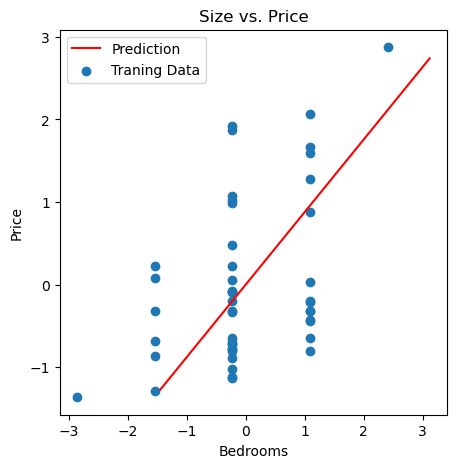

In [12]:
# get best fit line for Size vs. Price
x = np.linspace(data.Size.min(), data.Size.max(), 100)
f = g[0, 0] + (g[0, 1] * x)
# draw the line for Bedrooms vs. Price
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Bedrooms, data.Price, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Bedrooms')
ax.set_ylabel('Price')
ax.set_title('Size vs. Price')


Text(0.5, 1.0, 'Error vs. Training Epoch')

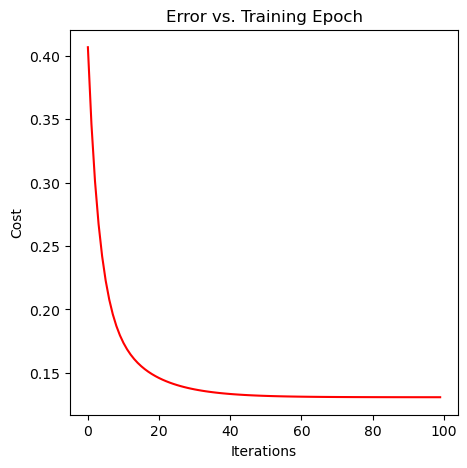

In [13]:
# draw error graph
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
